In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as ss
import sklearn as sk
from sklearn.cluster import KMeans

In [43]:
df_kaggle = pd.read_csv('../dataset/data.csv').dropna()
df_features = pd.read_csv('../dataset/features.csv').dropna()
df_paises = pd.read_csv('../dataset/paises.csv')

In [44]:
df = df_kaggle.join(df_paises.set_index('Code'), on='Region').join(df_features.set_index('track_href'), on='URL')
df.drop(['Unnamed: 0', 'URL', 'type', 'uri', 'analysis_url'], axis='columns', inplace=True)
df = df.dropna()
df.head()

,Position,Track Name,Artist,Streams,Date,Region,Country,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,Ecuador,0.761,0.838,4.0,...,0.0,0.0502,0.40000,0.000000,0.176,0.710,93.974,3AEZUABDXNtecAOSC1qTfo,222560.0,4.0
1,2,Chantaje,Shakira,19270,2017-01-01,ec,Ecuador,0.852,0.773,8.0,...,0.0,0.0776,0.18700,0.000030,0.159,0.907,102.034,6mICuAdrwEjh6Y6lroV2Kg,195840.0,4.0
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec,Ecuador,0.832,0.772,10.0,...,1.0,0.1000,0.05590,0.000486,0.440,0.704,96.016,3QwBODjSEzelZyVjxPOHdq,209453.0,4.0
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec,Ecuador,0.663,0.920,11.0,...,0.0,0.2260,0.00431,0.000017,0.101,0.533,99.935,7DM4BPaS7uofFul3ywMe46,259196.0,4.0
4,5,Safari,J Balvin,14269,2017-01-01,ec,Ecuador,0.508,0.687,0.0,...,1.0,0.3260,0.55100,0.000003,0.126,0.555,180.044,6rQSrBHf7HlZjtcMZ4S4bO,205600.0,4.0


# Análise Exploratória

## Países

In [45]:
paises = df.Country.unique().tolist()
paises.sort()
print(paises)

['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czech Rep.', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Global', 'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxemburgo', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Singapore', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'United Kingdom', 'United States', 'Uruguay']


## Features Musicais - Spotify Global

In [46]:
def featToPlot(df):
    return [
        df.acousticness,
        df.danceability,
        df.energy,
        df.instrumentalness,
        df.liveness,
        df.speechiness,
        df.valence
    ]

# Plot defaults
flierprops = dict(markerfacecolor='#fff', alpha=0.3)
whiskerprops = dict(color='#1db954', linewidth=2)
capprops = dict(color='#1db954', linewidth=2)
boxprops = dict(color='#1db954', facecolor='#1ed760', linewidth=2)
medianprops = dict(color='#000', linewidth=2)
labels = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Speechiness', 'Valence']

### Distribuição dos Dados com Boxplots

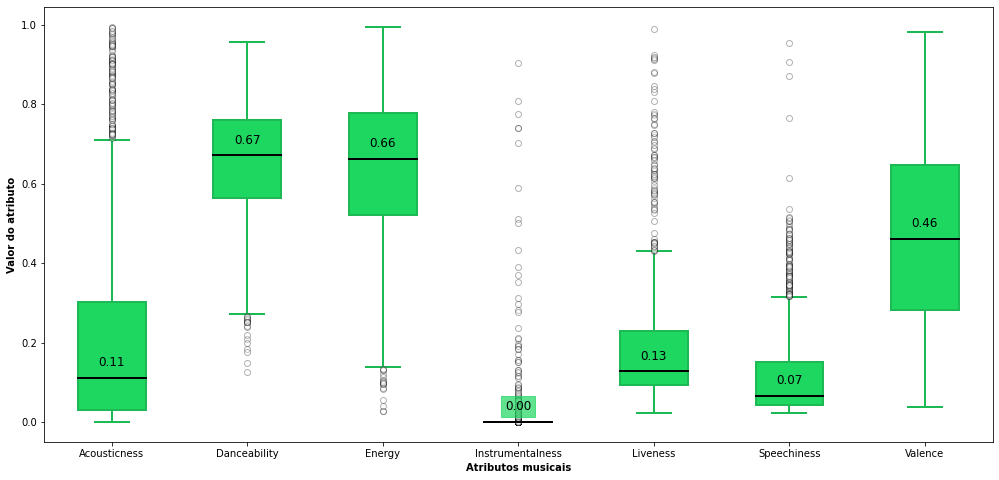

In [47]:
df_global = df[df.Country == 'Global'].drop_duplicates(subset='id')
data_to_plot = featToPlot(df_global)
fig = plt.figure(1, figsize=(17,8))
ax = fig.add_subplot(111)
ax.set_facecolor('#fff')

bp = ax.boxplot(
    data_to_plot,
    flierprops=flierprops,
    whiskerprops=whiskerprops, 
    capprops=capprops,
    boxprops=boxprops,
    medianprops=medianprops,
    patch_artist=True
)

plt.xticks(range(1,8), labels)
plt.xlabel('Atributos musicais', fontweight ='bold')
plt.ylabel('Valor do atributo', fontweight ='bold')

mediana_global = np.median(featToPlot(df_global), axis=1)
for i in range(7):
    plt.text(i+0.9, mediana_global[i]+0.03, "{:.2f}".format(mediana_global[i]), fontdict={'size': 12},
        bbox=dict(alpha=0.7, color='#1ed760')
    )
    
plt.show()

### Média e Mediana por Feature

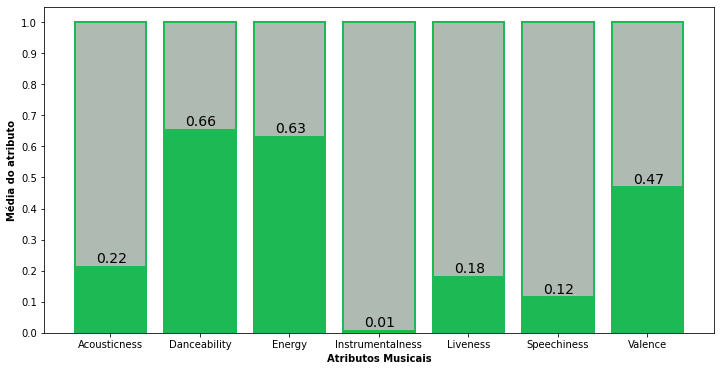

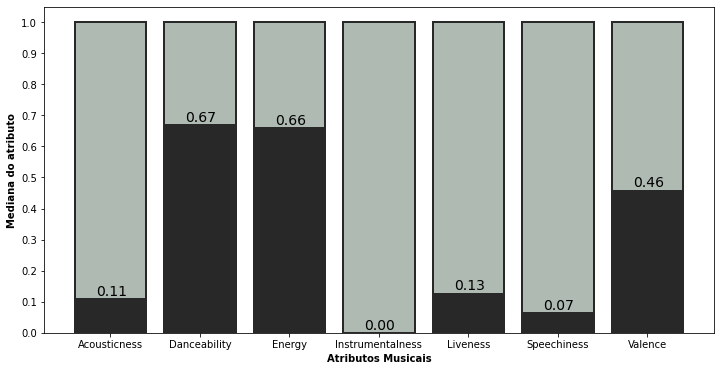

In [48]:
# MEDIA
media_global = np.mean(featToPlot(df_global), axis=1)

fig = plt.figure(figsize=(12,6))
fundo = plt.bar(labels, np.ones(7), color='#afbab3', edgecolor='#1db954', linewidth=2)
barras = plt.bar(labels, media_global, color='#1db954')

for i in range(7):
    plt.text(i-0.16, media_global[i]+0.01, "{:.2f}".format(media_global[i]), fontdict={'size': 14})

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Atributos Musicais', fontweight ='bold')
plt.ylabel('Média do atributo', fontweight ='bold')
plt.show()


# MEDIANA
mediana_global = np.median(featToPlot(df_global), axis=1)

fig = plt.figure(figsize=(12,6))
fundo = plt.bar(labels, np.ones(7), color='#afbab3', edgecolor='#282828', linewidth=2)
barras = plt.bar(labels, mediana_global, color='#282828')

for i in range(7):
    plt.text(i-0.16, mediana_global[i]+0.01, "{:.2f}".format(mediana_global[i]), fontdict={'size': 14})

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Atributos Musicais', fontweight ='bold')
plt.ylabel('Mediana do atributo', fontweight ='bold')
plt.show()

### Distribuição com Histograma

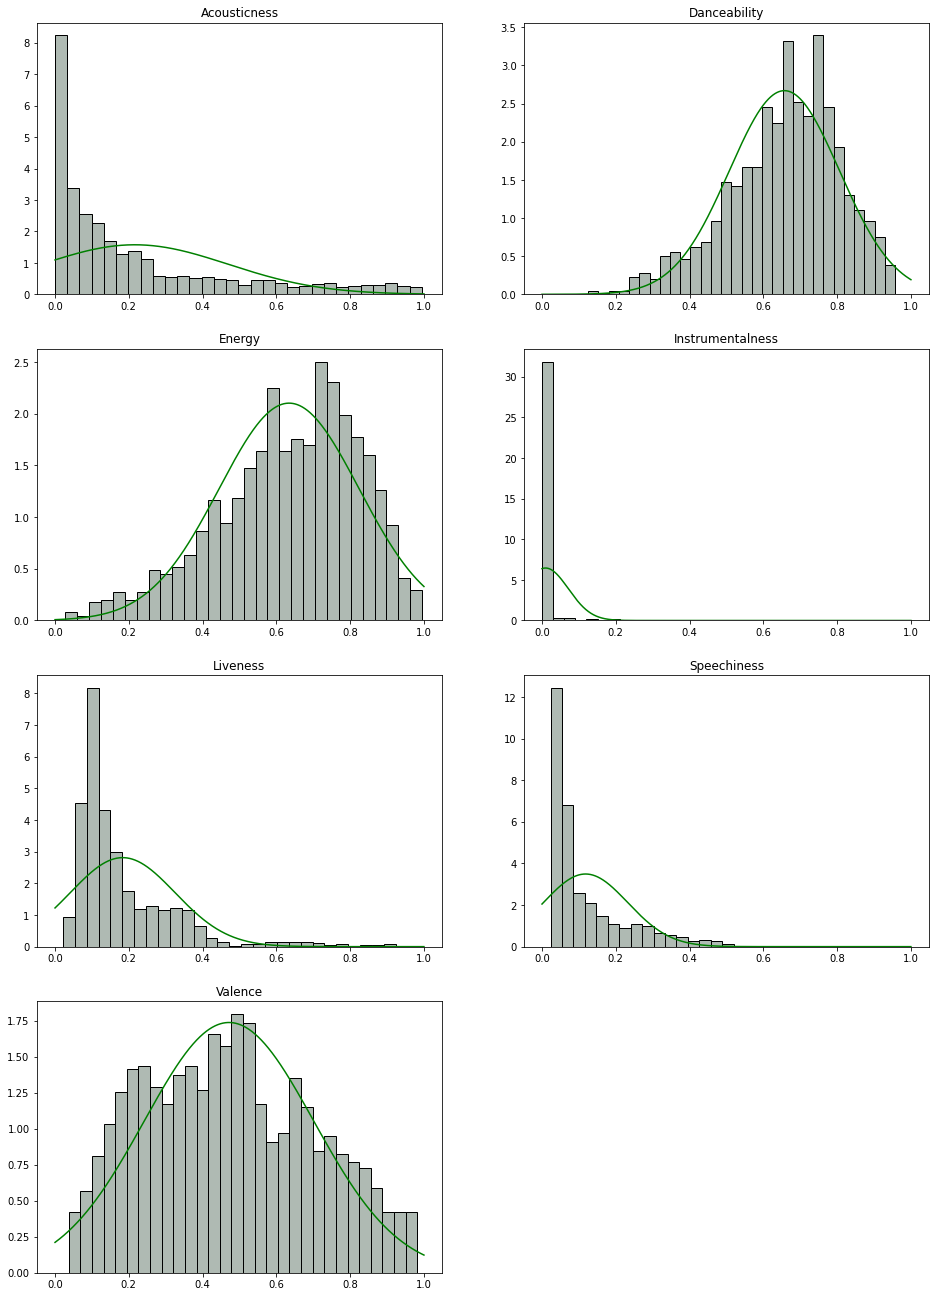

In [8]:
features = featToPlot(df_global)
indice_df = 0
fig, axs = plt.subplots(4, 2, figsize=(16,23))

for i in range(4):
    for j in range(2):
        if(indice_df < 7):
            media = features[indice_df].mean()
            dp = features[indice_df].std()
            x = np.linspace(0, 1, 10000)
            norm = ss.norm.pdf(x, media, dp)
            axs[i, j].hist(features[indice_df], bins=30, density=True, color='#afbab3', edgecolor='black')
            axs[i, j].plot(x, norm, color='#008000')
            axs[i, j].title.set_text(labels[indice_df])
            indice_df += 1
            
fig.delaxes(axs[3][1])

### Caso Específico: Acousticness

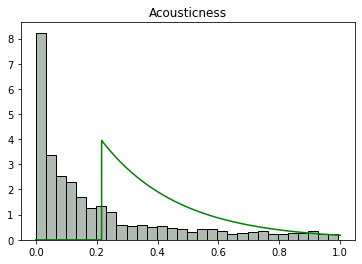

In [9]:
media = features[0].mean()
dp = features[0].std()
x = np.linspace(0, 1, 10000)
pdf = ss.expon.pdf(x, media, dp)
plt.hist(features[0], bins=30, density=True, color='#afbab3', edgecolor='black')
plt.plot(x, pdf, color='#008000')
plt.title(labels[0])
plt.show()

## Features Musicais - Spotify Brasil

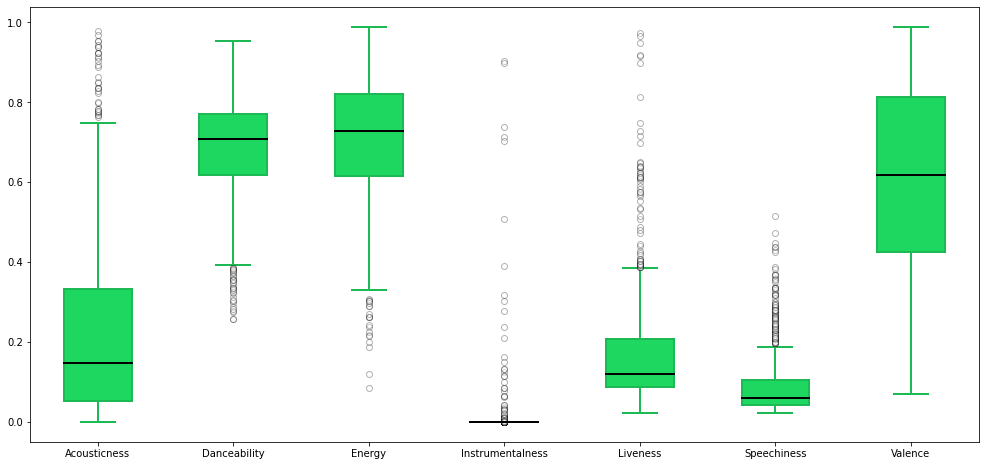

In [10]:
df_brasil = df[df.Country == 'Colombia'].drop_duplicates(subset='id')
data_to_plot = featToPlot(df_brasil)
fig = plt.figure(1, figsize=(17,8))
ax = fig.add_subplot(111)
ax.set_facecolor('#fff')

bp = ax.boxplot(
    data_to_plot,
    flierprops=flierprops,
    whiskerprops=whiskerprops, 
    capprops=capprops,
    boxprops=boxprops,
    medianprops=medianprops,
    patch_artist=True
)

plt.xticks(range(1,8), labels)
plt.show()

## Análise com músicas únicas por país

In [49]:
paises_semnan = paises.copy()
paises_semnan.remove('Luxemburgo')
paises_semnan.remove('Global')

def unicas_por_pais(pais):
    df_pais = df[df.Country == pais].drop_duplicates(subset='id')
    unicas = df['id'][df.Country != pais].drop_duplicates().tolist()
    return df_pais[~df_pais.id.isin(unicas)]

def plot_features(pais):
    data_to_plot = featToPlot(pais)
    fig = plt.figure(1, figsize=(17,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor('#fff')

    bp = ax.boxplot(
        data_to_plot,
        flierprops=flierprops,
        whiskerprops=whiskerprops, 
        capprops=capprops,
        boxprops=boxprops,
        medianprops=medianprops,
        patch_artist=True
    )

    plt.xticks(range(1,8), labels)
    plt.xlabel('Atributos musicais', fontweight ='bold')
    plt.ylabel('Valor do atributo', fontweight ='bold')
    plt.show()
    
def mediaPaises(feature):
    medias = []
    for pais in paises_semnan:
        medias.append({'pais': pais, 'media': np.mean(unicas_por_pais(pais)[feature])})
    return medias

def plotMediaTodosPaises(feature):
    media_valence = mediaPaises(feature)
    media_valence = sorted(media_valence, key = lambda i: i['media'])
    media_values = [i['media'] for i in media_valence]
    pais_values = [i['pais'] for i in media_valence]

    fig = plt.figure(figsize=(6,21))
    fundo = plt.barh(pais_values, np.ones(52), color='#afbab3', edgecolor='#1db954', linewidth=2)
    plt.barh(pais_values, media_values, color='#1db954')

    for i in range(52):
        plt.text(media_values[i], i-0.2, "{:.2f}".format(media_values[i]), fontdict={'size': 14})

    plt.xlabel('Média ' + feature, fontweight ='bold', fontsize=16)
    plt.show()

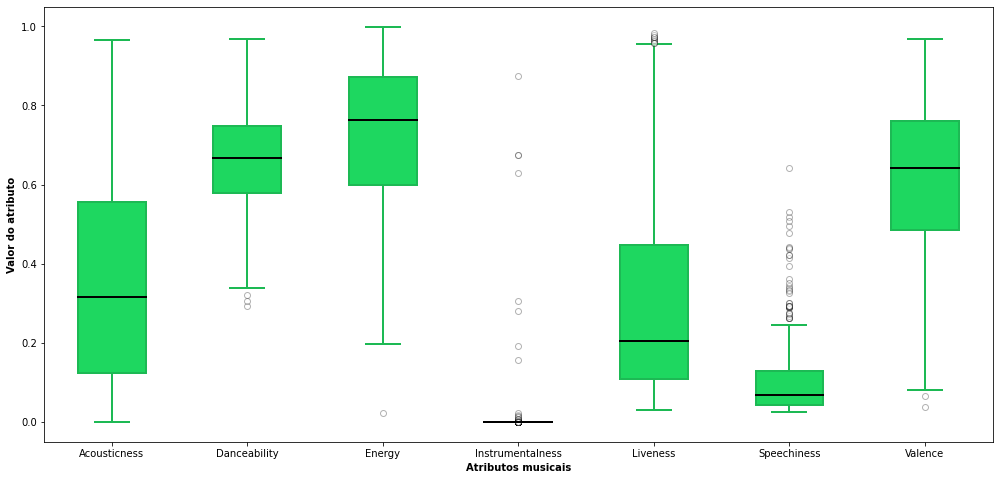

In [45]:
plot_features(unicas_por_pais('Brazil'))

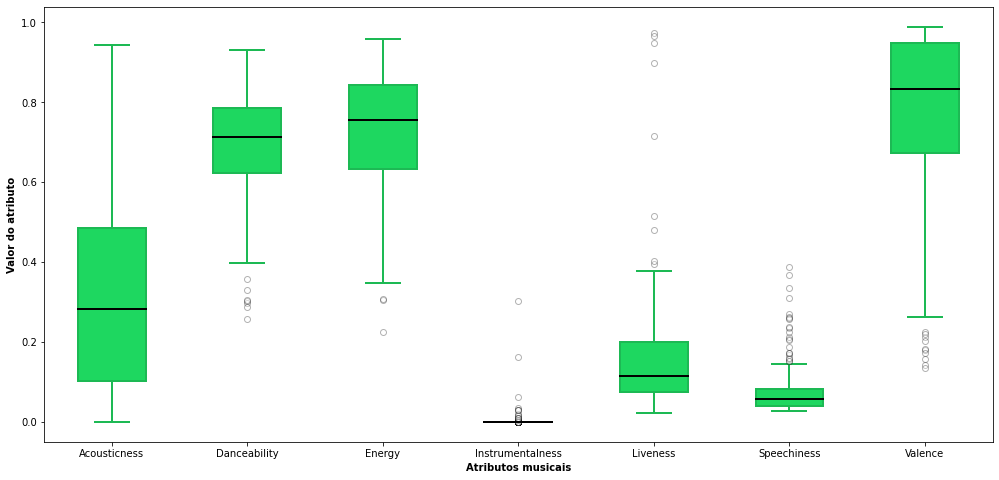

In [46]:
plot_features(unicas_por_pais('Colombia'))

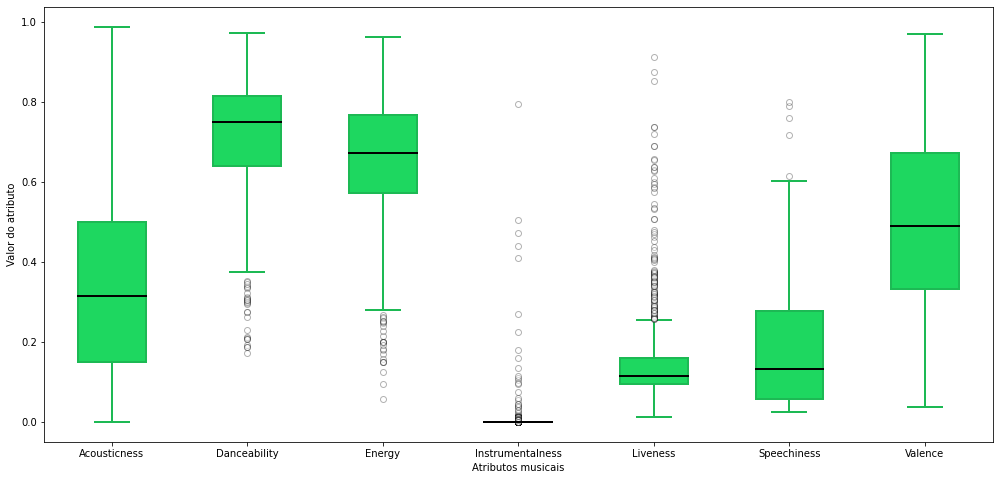

In [14]:
plot_features(unicas_por_pais('France'))

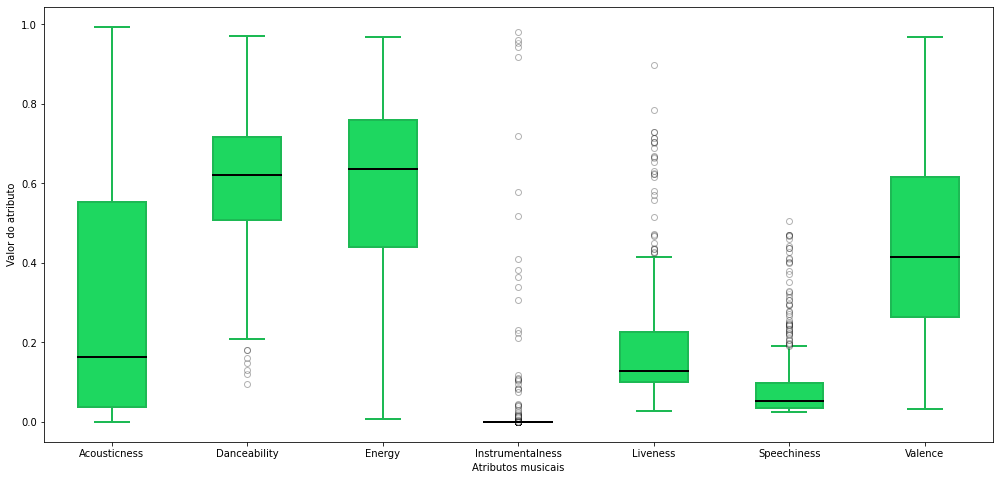

In [15]:
plot_features(unicas_por_pais('Norway'))

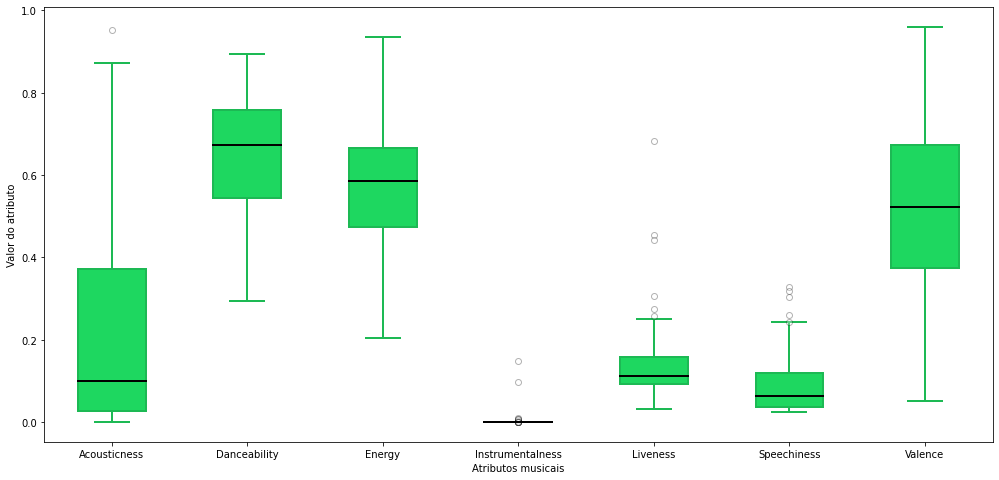

In [16]:
plot_features(unicas_por_pais('New Zealand'))

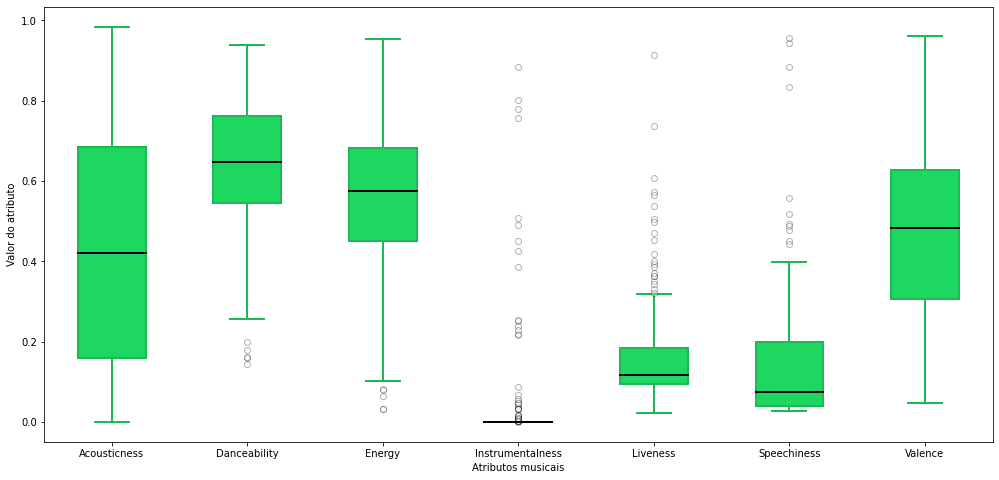

In [17]:
plot_features(unicas_por_pais('Portugal'))

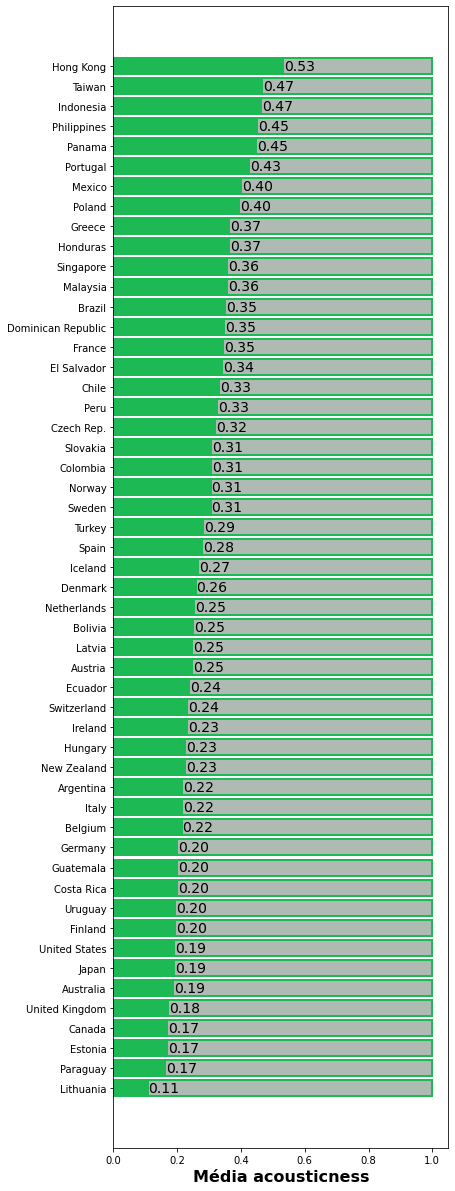

In [51]:
# demora
plotMediaTodosPaises('acousticness')

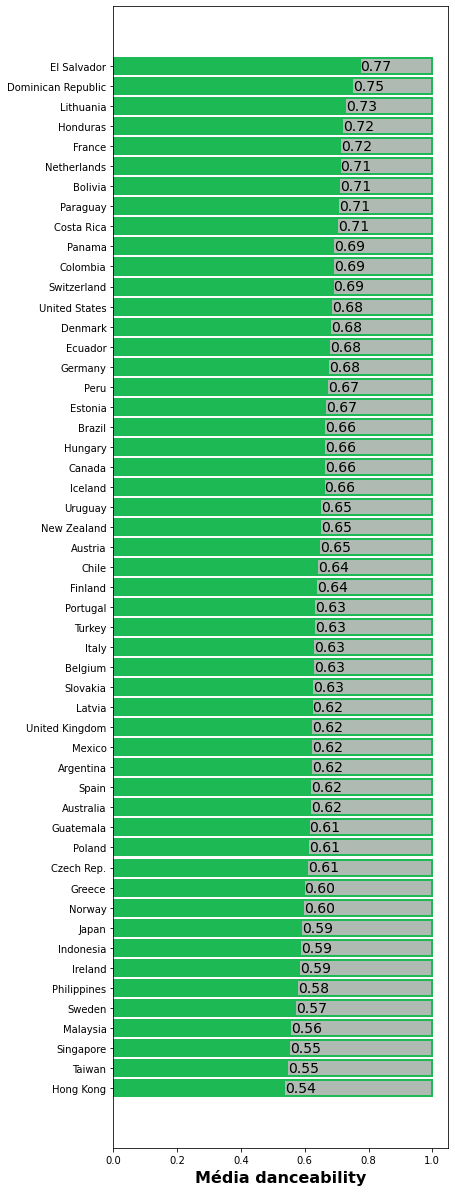

In [52]:
# demora
plotMediaTodosPaises('danceability')

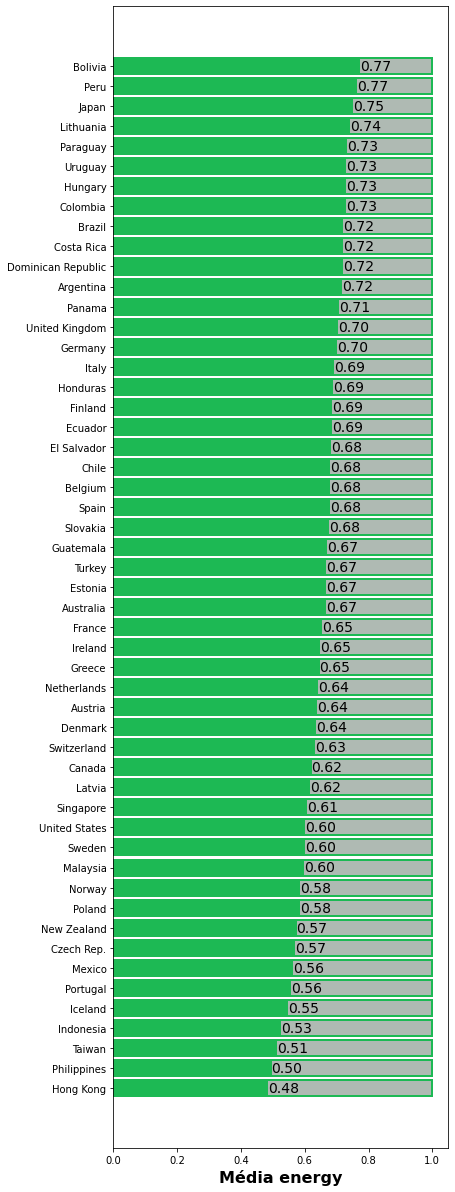

In [53]:
# demora
plotMediaTodosPaises('energy')

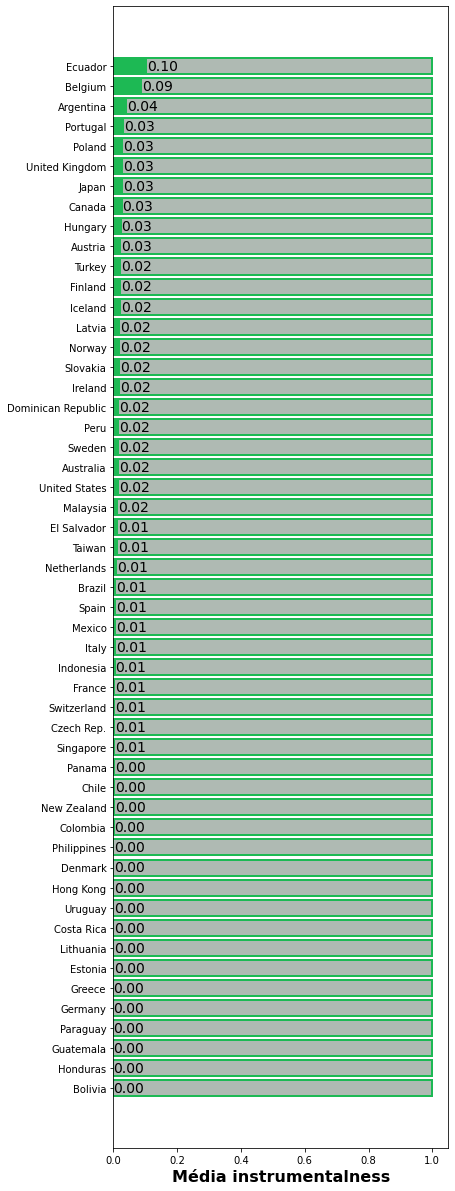

In [54]:
# demora
plotMediaTodosPaises('instrumentalness')

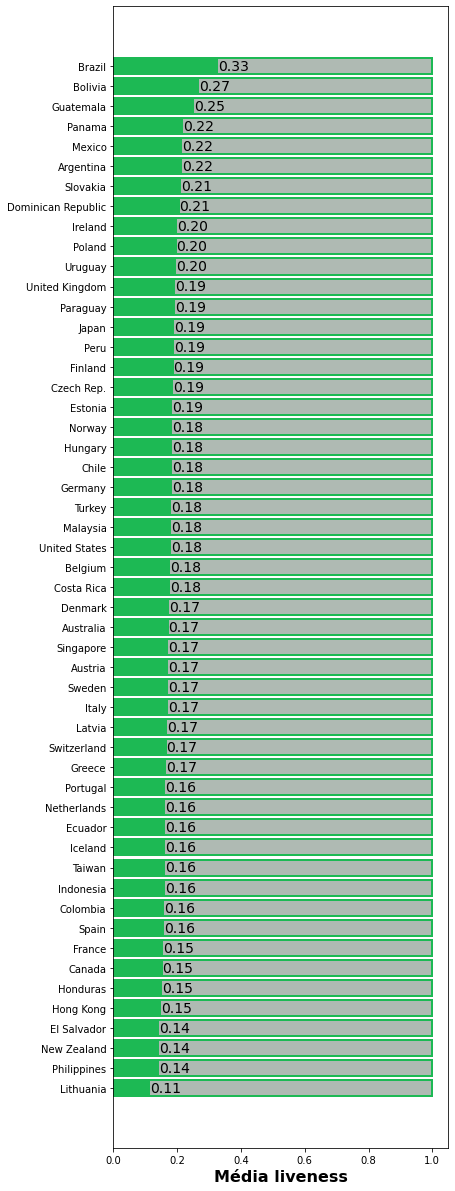

In [50]:
# demora
plotMediaTodosPaises('liveness')

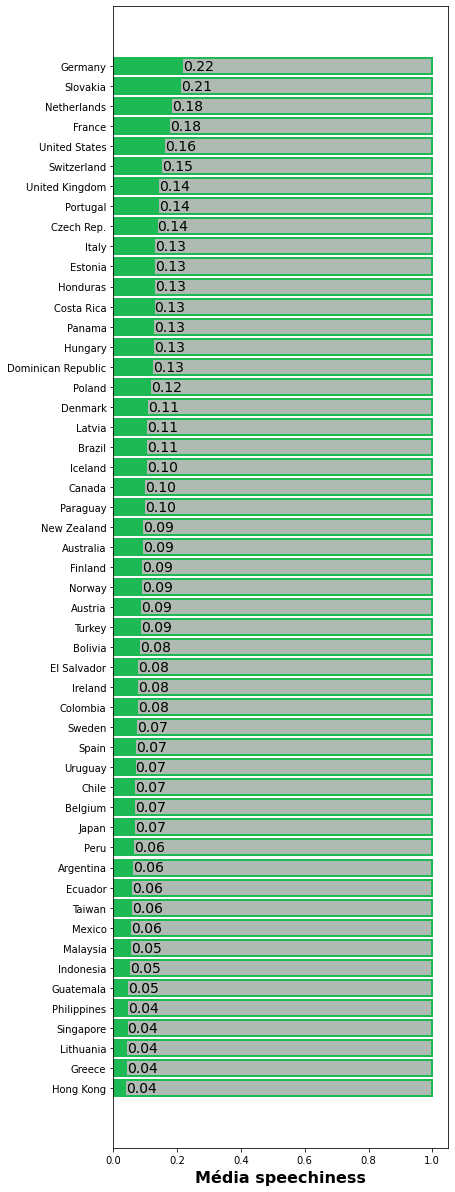

In [55]:
# demora
plotMediaTodosPaises('speechiness')

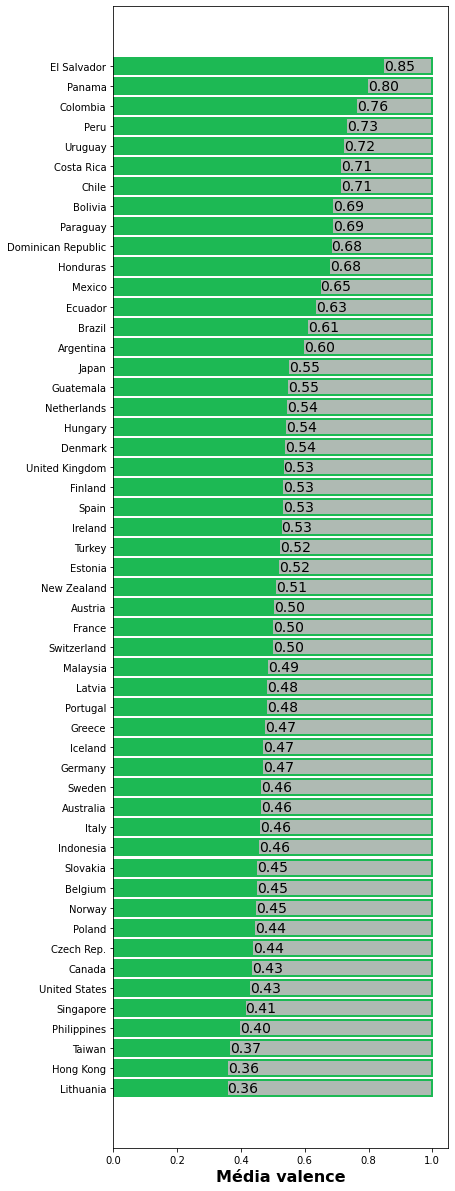

In [56]:
# demora
plotMediaTodosPaises('valence')

## K-Means

In [7]:
frames = []

for pais in paises:
    unicas = unicas_por_pais(pais)
    frames.append(unicas)
    
df_unicas = pd.concat(frames)

In [8]:
len(df_unicas.Country.unique().tolist())

52

In [9]:
features_paises = df_unicas[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'Country', 'id']]
X = np.array(features_paises.drop(['Country', 'id'], axis = 1))


In [10]:
features_paises

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,Country,id
148529,0.0333,0.766,0.548,0.000000,0.2530,0.0404,0.791,Argentina,74onbSJ49kgKFGrwUwY9oC
148534,0.0759,0.614,0.702,0.000000,0.2970,0.0316,0.851,Argentina,6jDx3MNG0yJdrvEBZohKBE
148537,0.3710,0.778,0.813,0.000082,0.1480,0.0304,0.962,Argentina,3XmpHN0jwCV1unk8ygs1Ku
148542,0.1990,0.740,0.768,0.000000,0.0832,0.0603,0.867,Argentina,68drjp77R32xEkzP1vxlF6
148544,0.1040,0.648,0.833,0.000000,0.3900,0.0301,0.910,Argentina,7IUFDlflcQjHNxg8H0us34
...,...,...,...,...,...,...,...,...,...
2397855,0.1930,0.848,0.593,0.000000,0.1330,0.0734,0.929,Uruguay,4AKm9SfY8az1ZV9ltcL6LD
2397861,0.2870,0.600,0.550,0.000000,0.2140,0.0340,0.665,Uruguay,3XCrzLeLOVBRp1IbNmdzJX
2397865,0.5110,0.593,0.557,0.000000,0.2450,0.0693,0.736,Uruguay,2aihVG2wlZJapDbB6eQ3sm
2397872,0.1880,0.786,0.685,0.000000,0.3710,0.0460,0.838,Uruguay,6cXD2DrBPeHq4yMKlUYBch


### K-means normalizado

* z-normalizar os dados (standardScaler.fit_transform(X))
* clusters de 2 a 20 e verificar a inertia_

In [29]:
dados_normalizados = sk.preprocessing.StandardScaler().fit_transform(X)

In [30]:
# dados normalizados
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados_normalizados)
    print('intertia com', i, ':', kmeans.inertia_)

intertia com 2 : 81936.00301619989
intertia com 3 : 69749.75528236496
intertia com 4 : 59899.97638694906
intertia com 5 : 52211.195614170494
intertia com 6 : 45507.028405823025
intertia com 7 : 42561.25501868957
intertia com 8 : 40027.16733122866
intertia com 9 : 37924.96230248907
intertia com 10 : 36325.982260203964
intertia com 11 : 34912.33710478572
intertia com 12 : 33718.59289302967
intertia com 13 : 32683.342745485483
intertia com 14 : 31814.98262578587
intertia com 15 : 30897.676351694365
intertia com 16 : 30169.06346083449
intertia com 17 : 29415.02320075901
intertia com 18 : 28856.724384777892
intertia com 19 : 28211.102075550556
intertia com 20 : 27743.376981920013


In [11]:
# dados não normalizados
valoresK = []
valoresInertia = []

for k in range(2,21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    valoresK.append(k)
    valoresInertia.append(kmeans.inertia_)
    print('intertia com', k, ':', kmeans.inertia_)

intertia com 2 : 2316.0344500435654
intertia com 3 : 1876.1767295505256
intertia com 4 : 1663.559588255415
intertia com 5 : 1528.8769941886826
intertia com 6 : 1421.5463664814756
intertia com 7 : 1342.264614592395
intertia com 8 : 1277.1912277141303
intertia com 9 : 1217.8908540011116
intertia com 10 : 1165.2084839269162
intertia com 11 : 1120.7216769285283
intertia com 12 : 1084.827512220005
intertia com 13 : 1053.9760993449015
intertia com 14 : 1023.741451206169
intertia com 15 : 997.2193660154479
intertia com 16 : 965.2272067989485
intertia com 17 : 941.2081758215884
intertia com 18 : 920.8309170195799
intertia com 19 : 899.1137948508758
intertia com 20 : 882.0644807268849


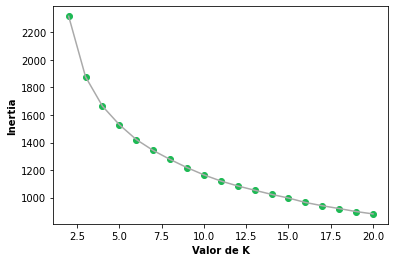

In [12]:
plt.plot(valoresK, valoresInertia, color='#aaa')
plt.scatter(valoresK, valoresInertia, color='#1db954')
plt.xlabel('Valor de K', fontweight ='bold')
plt.ylabel('Inertia', fontweight ='bold')
plt.show()

In [13]:
diferencas = []
for k, valor in enumerate(valoresInertia):
    if k == 0:
        continue
    diferencas.append(valoresInertia[k]-valoresInertia[k-1])
    
diferencas

[-439.8577204930398,
 -212.6171412951105,
 -134.68259406673246,
 -107.33062770720699,
 -79.28175188908062,
 -65.07338687826473,
 -59.300373713018644,
 -52.68237007419543,
 -44.48680699838792,
 -35.89416470852325,
 -30.851412875103506,
 -30.234648138732496,
 -26.5220851907211,
 -31.99215921649943,
 -24.019030977360103,
 -20.37725880200844,
 -21.717122168704122,
 -17.04931412399094]

Text(0, 0.5, 'Diferenças entre K e K-1')

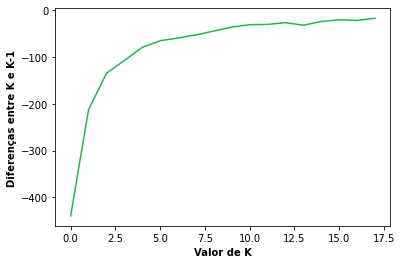

In [14]:
plt.plot(diferencas, color='#1db954')
plt.xlabel('Valor de K', fontweight ='bold')
plt.ylabel('Diferenças entre K e K-1', fontweight ='bold')

In [15]:
# kmeans = KMeans(n_clusters=10000, random_state=0)
# kmeans.fit(X)
# print('intertia com', k, ':', kmeans.inertia_)

In [17]:
# usando o k-means com k onda e inertia se estabiliza
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
kmeans.labels_

array([6, 6, 6, ..., 5, 6, 6], dtype=int32)

In [18]:
features_paises_grupos = features_paises.copy()
features_paises_grupos['grupos'] = kmeans.labels_
features_paises_grupos

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,Country,id,grupos
148529,0.0333,0.766,0.548,0.000000,0.2530,0.0404,0.791,Argentina,74onbSJ49kgKFGrwUwY9oC,6
148534,0.0759,0.614,0.702,0.000000,0.2970,0.0316,0.851,Argentina,6jDx3MNG0yJdrvEBZohKBE,6
148537,0.3710,0.778,0.813,0.000082,0.1480,0.0304,0.962,Argentina,3XmpHN0jwCV1unk8ygs1Ku,6
148542,0.1990,0.740,0.768,0.000000,0.0832,0.0603,0.867,Argentina,68drjp77R32xEkzP1vxlF6,6
148544,0.1040,0.648,0.833,0.000000,0.3900,0.0301,0.910,Argentina,7IUFDlflcQjHNxg8H0us34,6
...,...,...,...,...,...,...,...,...,...,...
2397855,0.1930,0.848,0.593,0.000000,0.1330,0.0734,0.929,Uruguay,4AKm9SfY8az1ZV9ltcL6LD,6
2397861,0.2870,0.600,0.550,0.000000,0.2140,0.0340,0.665,Uruguay,3XCrzLeLOVBRp1IbNmdzJX,5
2397865,0.5110,0.593,0.557,0.000000,0.2450,0.0693,0.736,Uruguay,2aihVG2wlZJapDbB6eQ3sm,5
2397872,0.1880,0.786,0.685,0.000000,0.3710,0.0460,0.838,Uruguay,6cXD2DrBPeHq4yMKlUYBch,6


In [19]:
porcentagem_paises = []
paises = features_paises_grupos.Country.unique()
for pais in paises:
    porcentagem = len(features_paises_grupos[features_paises_grupos.Country == pais]) / len(features_paises_grupos)
    porcentagem_paises.append(porcentagem*100)

df_porcentagem_paises = pd.DataFrame({'pais': paises, 'porcentagem': porcentagem_paises})
df_porcentagem_paises

,pais,porcentagem
0,Argentina,0.855438
1,Australia,0.988064
2,Austria,0.994695
3,Belgium,0.988064
4,Bolivia,0.053050
5,Brazil,2.871353
6,Canada,1.007958
7,Chile,1.591512
8,Colombia,1.485411
9,Costa Rica,0.298408


In [20]:
def plot_tabela(num_grupo):
    grupo = pd.DataFrame()

    musicas_grupo = features_paises_grupos[features_paises_grupos.grupos == num_grupo]
    paises_grupo = musicas_grupo.Country.unique()
    pais_qtd = []
    pais_porc = []

    for pais in paises_grupo:
        qtd = len(musicas_grupo[musicas_grupo.Country == pais])
        pais_qtd.append(qtd)
        pais_porc.append((qtd/len(musicas_grupo))*100)

    grupo['pais'] = paises_grupo
    grupo['quantidade'] = pais_qtd
    grupo['porcentagem'] = pais_porc

    return grupo.sort_values(by=['quantidade', 'pais'], ascending=False)

def qui_quadrado(grupoK):
    observado = grupoK.sort_values(by=['pais']).porcentagem
    esperado = df_porcentagem_paises[df_porcentagem_paises.pais.isin(grupoK.pais)].porcentagem
    return ss.chisquare(observado, esperado)

In [23]:
g0 = plot_tabela(0)
g1 = plot_tabela(1)
g2 = plot_tabela(2)
g3 = plot_tabela(3)
g4 = plot_tabela(4)
g5 = plot_tabela(5)
g6 = plot_tabela(6)

In [24]:
teste_chi = pd.DataFrame([
    qui_quadrado(g0),
    qui_quadrado(g1),
    qui_quadrado(g2),
    qui_quadrado(g3),
    qui_quadrado(g4),
    qui_quadrado(g5),
    qui_quadrado(g6),
])

teste_chi

,statistic,pvalue
0,37.047599,0.874276
1,79.280024,0.002244
2,31.580744,0.958791
3,77.714040,0.000663
4,26.077535,0.995885
5,42.276995,0.772907
6,17.443480,0.999995


In [28]:
g2.head()

,pais,quantidade,porcentagem
43,Taiwan,362,19.868277
20,Hong Kong,117,6.421515
16,France,99,5.433589
25,Italy,80,4.390779
30,Netherlands,79,4.335895


In [29]:
g4.head()

,pais,quantidade,porcentagem
26,Japan,278,11.421528
44,Taiwan,233,9.572720
15,Finland,232,9.531635
25,Italy,210,8.627773
42,Sweden,180,7.395234


In [30]:
g6.head()

,pais,quantidade,porcentagem
16,Finland,354,9.190031
28,Japan,305,7.917965
32,Netherlands,281,7.294912
44,Sweden,205,5.321911
27,Italy,193,5.010384


In [38]:
g6.quantidade.sum()

3852